In [16]:
from fastai import *
from fastai.tabular import*

In [17]:
torch.cuda.set_device(1)

In [18]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
train_df, valid_df = df[:-2000].copy(),df[:-2000].copy()
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [22]:
dep_var= 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation','relationship','race']
cont_names = ['age','fnlwgt','education-num']
procs = [FillMissing, Categorify, Normalize]

In [23]:
test = TabularList.from_df(df.iloc[800:1000].copy(),path=path,cat_names=cat_names,cont_names=cont_names)

In [24]:
data = (TabularList.from_df(df,path=path,cat_names = cat_names,cont_names=cont_names,procs=procs)
                            .split_by_idx(list(range(800,1000)))
                            .label_from_df(cols = dep_var)
                            .add_test(test,label=0)
                            .databunch())

In [25]:
data.show_batch(rows=15)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
?,HS-grad,Married-civ-spouse,?,Husband,Black,False,0.0303,0.4788,-0.4224,<50k
Private,Bachelors,Married-spouse-absent,Craft-repair,Not-in-family,Black,False,-0.0430,0.9726,1.1422,<50k
Private,HS-grad,Never-married,Handlers-cleaners,Other-relative,White,False,-1.4357,0.1617,-0.4224,<50k
Private,Bachelors,Never-married,Exec-managerial,Own-child,White,False,1.0564,0.8229,1.1422,<50k
Private,9th,Married-civ-spouse,Priv-house-serv,Wife,Black,False,2.8156,1.4667,-1.9869,<50k
Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,False,0.4701,-0.7176,1.9245,>=50k
Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,False,-1.3624,-0.7664,-0.4224,<50k
Private,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,False,2.0826,0.5484,-0.4224,<50k
Private,HS-grad,Never-married,Farming-fishing,Own-child,White,False,-1.1425,1.5546,-0.4224,<50k
Private,Masters,Never-married,Exec-managerial,Not-in-family,White,False,-0.3362,-0.1909,1.5334,<50k


In [27]:
learn = tabular_learner(data,layers=[200,100],metrics=accuracy)
learn.fit(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.361494,0.379450,0.825000,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


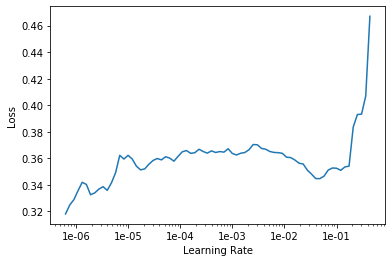

In [28]:
lr_find(learn)
learn.recorder.plot()

In [30]:
ed= pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
